In [2]:
# !pip install pandas
import pandas as pd

df = pd.DataFrame(
    {
        "Name" : [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age" : [22, 35, 58],
        "Sex" : ["male", "male", "female"]
    }
)

In [4]:
display(df) # print 는 모양이 안예뻐서 display 로

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


#### Series(시리즈) : 데이터 로그에서 한 줄 만 있는거

In [5]:
import pandas as pd
se = pd.Series([1,2,3,6])
display(se)

0    1
1    2
2    3
3    6
dtype: int64

###### 자동으로 색인을 만들지 않고 index 키워드를 사용해 원하는 색인의 이름을 입력

###### class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)[source]

In [13]:
import pandas as pd
se = pd.Series([1,2,3,6],['서울','대구','부산','광주'])
se['서울']
print(se[['서울','부산']])
print(type(se[['서울','부산']]))

서울    1
부산    3
dtype: int64
<class 'pandas.core.series.Series'>


#### index - 만들어진 시리즈에서 인덱스만을 출력

In [14]:
se.index # object 를 확인해서 어떻게 처리할 것인가

Index(['서울', '대구', '부산', '광주'], dtype='object')

#### values - 만들어진 시리즈 데이터에서 값들만을 출력

In [16]:
se.values

array([1, 2, 3, 6], dtype=int64)

#### sorted() - 정렬

In [17]:
sort = sorted(se.index)
display(sort)

['광주', '대구', '부산', '서울']

In [18]:
sort = sorted(se.values)
display(sort)

[1, 2, 3, 6]

In [21]:
sort = sorted(se.index)
reindex_se = se.reindex(sort)
display(reindex_se)

광주    6
대구    2
부산    3
서울    1
dtype: int64

###### 시리즈의 합
######  – 인덱스별로 저장된 값들의 합을 구함
###### – x와 y에 공통된 인덱스가 존재해야 더할 수 있으므로  NaN으로 표시

In [24]:
se_x = pd.Series([4,10,3,6], index=['서울','대전','대구','부산'])
se_y = pd.Series([100,123,3,6], index=['서울','대전','대구','부산'])
se_x+se_y

서울    104
대전    133
대구      6
부산     12
dtype: int64

In [25]:
se_x = pd.Series([4,10,3,6], index=['서울','대전','대구','부산'])
se_y = pd.Series([100,123,3,6], index=['서울','대전','전주','광주'])
se_x+se_y 

광주      NaN
대구      NaN
대전    133.0
부산      NaN
서울    104.0
전주      NaN
dtype: float64

#### unique() - 시리즈로부터 유일한 값들만을 반환

In [29]:
medal = [1,2,3,1,2,5,6,2]
se = pd.Series(medal)
se.unique()

array([1, 2, 3, 5, 6], dtype=int64)

In [31]:
data = {'alice': [1, 2, 3], 'bob': 20, 'tony': 15, 'suzy': 30,"dodo": [1,3,5,7], "mario": "pitch"}
x = pd.Series(data)
x

alice       [1, 2, 3]
bob                20
tony               15
suzy               30
dodo     [1, 3, 5, 7]
mario           pitch
dtype: object

In [34]:
data = {'alice': [1, 2, 3], 'bob': 20, 'tony': 15, 'suzy': 30,"dodo": [1,3,5,7], "mario": "pitch"}
x = pd.Series(data)
y = x[2:6]
display(y.values)
display(y.index)

array([15, 30, list([1, 3, 5, 7]), 'pitch'], dtype=object)

Index(['tony', 'suzy', 'dodo', 'mario'], dtype='object')

#### pandas.Series.to_frame

In [35]:
s = pd.Series(['a','b','c'], name="vals")
s

0    a
1    b
2    c
Name: vals, dtype: object

In [36]:
df = s.to_frame()
display(df)

,vals
0,a
1,b
2,c


## DataFrame

In [43]:
data = {
    'age' : [23,43,12,45],
    'name' : ['민준', '현우', '서연', '태경'],
    'height' : [175.3,180.3,165.8,200.3]
}
df = pd.DataFrame(data, columns = ['name','age','height'])
display(df)

,name,age,height
0,민준,23,175.3
1,현우,43,180.3
2,서연,12,165.8
3,태경,45,200.3


In [42]:
display(df.name)
display(df['age'])

0    민준
1    현우
2    서연
3    태경
Name: name, dtype: object

0    23
1    43
2    12
3    45
Name: age, dtype: int64

In [44]:
display(df['age'][0:2]) # 인덱싱

0    23
1    43
Name: age, dtype: int64

###### iloc() 메소드를 사용하여 특정한 행이나 위치의 내용들을 지정하여 출력 

In [50]:
ary = [[1,2],[3,4],[4,5]]
df = pd.DataFrame(ary, columns = ['First','Second'])
df

,First,Second
0,1,2
1,3,4
2,4,5


In [53]:
display(df[0:1]) # 데이터프레임형태
display(df.iloc[0]) # 시리즈형태

,First,Second
0,1,2


First     1
Second    2
Name: 0, dtype: int64

###### 모든 행의 마지막 데이터만을 출력

In [56]:
display(df.iloc[:,-1]) # -1 대신 0을 넣으면 첫번째 열, 1을 넣으면 두번째 열

0    2
1    4
2    5
Name: Second, dtype: int64

In [59]:
df.iloc[0:2,-1]

0    2
1    4
Name: Second, dtype: int64

In [62]:
# 판다스로 csv 파일 읽어오기
df = pd.read_csv('train.csv')

###### Head()

In [63]:
df.head() # 앞에서 5개

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [64]:
df.tail() # 뒤에서 5개

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [65]:
df.head(10) # 앞에서 10개

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [66]:
df.head(-10) # 끝에서 10개 빼고

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Over...,1
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California ...,1
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1


In [67]:
df.tail(-10) # 앞에서 10개 빼고

,id,keyword,location,text,target
10,16,NaN,NaN,Three people died from the heat wave so far,1
11,17,NaN,NaN,Haha South Tampa is getting flooded hah- WAIT ...,1
12,18,NaN,NaN,#raining #flooding #Florida #TampaBay #Tampa 1...,1
13,19,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,1
14,20,NaN,NaN,Damage to school bus on 80 in multi car crash ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [71]:
ary = [[1,2],[3,4],[4,5],[6,7],[8,9]]
data = pd.DataFrame(ary, columns=['First','Second'])
bools = [False, True, False, True, False]
display(data)
display(data['Second'][bools])

,First,Second
0,1,2
1,3,4
2,4,5
3,6,7
4,8,9


1    4
3    7
Name: Second, dtype: int64

In [76]:
# axis=0을 줘서 행방향=열의 합을 구할 수 있다.
ary = [[1,2],[3,4],[4,5],[6,7],[8,9]]
data = pd.DataFrame(ary, columns=['First','Second'])
display(data.max())
display(data.mean())
display(data.mean(axis=1)) # 각 행에 대한 평균
display(data.mean(axis=0)) # 각 열에 대한 평균

First     8
Second    9
dtype: int64

First     4.4
Second    5.4
dtype: float64

0    1.5
1    3.5
2    4.5
3    6.5
4    8.5
dtype: float64

First     4.4
Second    5.4
dtype: float64

In [82]:
import pandas as pd
df = pd.read_csv('경상남도_대기오염경보자동발령시스템_미세먼지 및 오존 측정데이터 자료_O3 시간평균_20200928.csv', engine='python', encoding='cp949')
df

,측정일시,성주동,웅남동,명서동,용지동,사파동,회원동,봉암동,월영동,경화동,...,남해읍,하동읍,산청읍,함양읍,거창읍,합천읍,반송로,최 저,최 고,평 균
0,2019,교정중,0.014,0.022,0.014,0.009,0.016,0.012,NaN,0.018,...,0.014,0.024,NaN,0.025,0.006,NaN,0.011,0.003,0.025,0.015
1,2019,교정중,0.013,0.02,0.017,0.014,0.014,0.009,NaN,0.015,...,0.012,0.021,NaN,0.033,0.005,NaN,0.013,0.004,0.033,0.014
2,2019,교정중,0.017,0.022,0.019,0.016,0.015,0.011,NaN,0.017,...,0.012,0.019,NaN,0.036,0.005,NaN,0.016,0.003,0.036,0.015
3,2019,교정중,0.023,0.028,0.025,0.024,0.021,0.016,NaN,0.021,...,0.012,0.028,NaN,0.038,0.006,NaN,0.022,0.005,0.038,0.019
4,2019,교정중,0.027,0.031,0.029,0.027,0.023,0.021,NaN,0.025,...,0.016,0.022,NaN,0.038,0.006,NaN,0.023,0.003,0.038,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019,0.025,0.03,0.031,0.027,0.022,0.021,0.029,0.028,0.033,...,0.027,0.035,0.039,0.036,0.027,0.01,0.016,0.010,0.039,0.027
8756,2019,0.027,0.03,0.033,0.03,0.024,0.024,0.029,0.028,0.032,...,0.019,0.029,0.038,0.036,0.02,0.011,0.017,0.010,0.038,0.026
8757,2019,0.027,0.032,0.034,0.03,0.025,0.024,0.028,0.032,0.029,...,0.017,0.033,0.036,0.036,0.021,0.02,0.018,0.007,0.036,0.027
8758,2019,0.029,0.031,0.035,0.029,0.028,0.024,0.029,0.031,0.031,...,0.013,0.032,0.036,0.036,0.025,0.019,0.019,0.004,0.037,0.027


#### 존재하지 않는 값

###### 처리하는 방법
###### ① 찾아서 복구
###### ② 해당 라인(행)을 삭제
###### ③ 해당 칼럼(열)이 중요하지 않다면 삭제
###### ④ 해당 값을 다른 값들의 평균을 구해 입력(빈도수가 가장 많은 것을 선택)

 DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False

In [97]:
import pandas as pd
from numpy import NaN
robots = [[23,23680],[35,NaN],[46,23680],[27,NaN]]
df = pd.DataFrame(robots, columns=['max_speed','price'])
display(df)

,max_speed,price
0,23,23680.0
1,35,NaN
2,46,23680.0
3,27,NaN


In [98]:
df.dropna(subset=['price']) # NaN 을 드롭시켜라, 기준 = price

,max_speed,price
0,23,23680.0
2,46,23680.0


In [99]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [NaN, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [100]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [101]:
df.dropna(axis='columns') # NaN 이 있는 columns 를 없애

,name
0,Alfred
1,Batman
2,Catwoman


In [105]:
df.dropna(thresh=2)
# value값이 선언한 thresh에 미치지 못하는 개수라면 해당 행이나 열 삭제

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [107]:
df.dropna(subset=['name', 'toy']) # 특정 값 나오면 삭제

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


###### 다른 값들의 평균을 구해 NaN를 대체

In [112]:
robots = [[23,23680],[35,NaN],[46,35485],[27,NaN]]
df = pd.DataFrame(robots, columns=['max_speed','price'])
mean = df.price.mean()
df1 = df.replace(NaN, mean) # NaN 을 mean 으로 대체
display(df1)

,max_speed,price
0,23,23680.0
1,35,29582.5
2,46,35485.0
3,27,29582.5


#### Binning
###### – 다수의 bin으로 그룹화하는 것
###### – 일반적으로 숫자의 크기별로 종류를 구분 짓는 것
###### – 특정 값들의 집합을 해당 bin에 할당

(array([0.   , 0.   , 0.   , 0.004, 0.006, 0.046, 0.07 , 0.178, 0.3  ,
        0.418, 0.366, 0.294, 0.188, 0.082, 0.026, 0.018, 0.004, 0.   ,
        0.   , 0.   ]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <BarContainer object of 20 artists>)

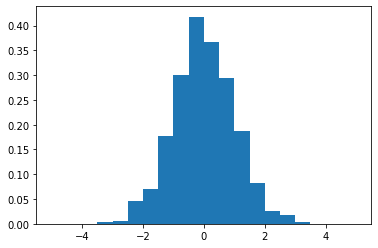

In [114]:
import matplotlib.pyplot as plt
import numpy as np
x=np.random.randn(1000)
plt.hist(x, density=True, bins=np.linspace(-5,5,21))

#### 데이터 포메팅 중 get_dummies()

In [124]:
import pandas as pd
import numpy as np
ary = [[1,1.1,'손'], [2,2.2,'날개'],[3,3.3,'손']]
df = pd.DataFrame(ary, columns=['수온','상온','hand'])
display(df)
df_1 = pd.get_dummies(df.hand)

,수온,상온,hand
0,1,1.1,손
1,2,2.2,날개
2,3,3.3,손


In [126]:
df = pd.merge(df , df_1,how='outer',left_index=True,right_index=True)
display(df)

,수온,상온,hand,날개_x,손_x,날개_y,손_y
0,1,1.1,손,0,1,0,1
1,2,2.2,날개,1,0,1,0
2,3,3.3,손,0,1,0,1


In [127]:
df=df.merge(df_1, how='cross') 
display(df)

,수온,상온,hand,날개_x,손_x,날개_y,손_y,날개,손
0,1,1.1,손,0,1,0,1,0,1
1,1,1.1,손,0,1,0,1,1,0
2,1,1.1,손,0,1,0,1,0,1
3,2,2.2,날개,1,0,1,0,0,1
4,2,2.2,날개,1,0,1,0,1,0
5,2,2.2,날개,1,0,1,0,0,1
6,3,3.3,손,0,1,0,1,0,1
7,3,3.3,손,0,1,0,1,1,0
8,3,3.3,손,0,1,0,1,0,1
